# Twitter Data

<br>

The ***Twitter API*** provides a wealth of data that journalists can use to glean insights, uncover trends, and even find breaking news. Here are some key types of data points that the API provides:

Tweets: The text content of the tweet, along with its ID, creation date, and source (e.g., Twitter for iPhone). This is often the primary data point of interest.

`User`: Information about the account that posted the tweet, including the username, profile description, location, follower count, friend count, and more.

`Engagement`: Metrics such as the number of likes, retweets, and replies that a tweet has received.

`Entities`: This includes hashtags, user mentions, URLs, and media associated with the tweet.

`Place`: If location tagging is enabled, this includes information about the place associated with the tweet.

`Language`: The language of the tweet.

How journalists can leverage these data:

`Identifying Trends`: By analyzing tweets and hashtags, journalists can identify trending topics and get a sense of public sentiment on various issues.

`Breaking News`: Journalists can monitor Twitter for breaking news. This is especially useful in situations where events are unfolding rapidly, such as during natural disasters or public demonstrations.

`Audience Engagement`: Journalists can gauge audience response to their stories by monitoring likes, retweets, and replies.

`Investigative Reporting`: The Twitter API can be used to gather data for investigative reporting. For example, a journalist might track the online activity of a public figure, or analyze tweets from a specific location to investigate local issues.

`Data Stories`: Journalists can use Twitter data to create data-driven stories or visualizations. For example, a journalist could create a map showing where tweets about a certain topic are coming from, or a chart showing how the popularity of a hashtag has changed over time.

<br>

<br>

***We will look at some twitter data from the top 20 most followed polticians of our country during the period of early covid time (Jun 2020 to Sep 2020) and make sense what they tweeted and do a sentimental analysis check***

<br>

In [1]:
import pandas as pd
# Load the Twitter data
df = pd.read_csv('../offline/data/Translated (To English).csv')

# Display the first few rows of the data
df.head()

,screen_name,created_at,text,retweet_count,favorite_count,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id,Translation
0,yadavakhilesh,2020-08-05T00:52:49Z,जय महादेव जय सिया-राम\nजय राधे-कृष्ण जय हनुमान...,3881,36026,NaN,NaN,Socialist Leader of India. Chief Minister of U...,Twitter for iPhone,hi,1.290000e+18,Jai Mahadev Jai Siya-Ram Jai Radhe-Krishna Ja...
1,yadavakhilesh,2020-08-03T16:21:00Z,रक्षाबंधन के पर्व पर हार्दिक शुभकामनाएँ! https...,3008,48607,NaN,NaN,Socialist Leader of India. Chief Minister of U...,Twitter for iPhone,hi,1.290000e+18,Best wishes on the festival of Rakshabandhan! ...
2,yadavakhilesh,2020-08-02T05:32:46Z,"कोरोनाकाल में न तो सीमाएं सुरक्षित हैं, न काम-...",2974,19255,NaN,NaN,Socialist Leader of India. Chief Minister of U...,Twitter for iPhone,hi,1.290000e+18,"In the coronary period, neither the borders ar..."
3,yadavakhilesh,2020-08-08T05:27:14Z,वर्तमान मुख्यमंत्री का निष्फल कार्यकाल इसी बात...,2777,18243,NaN,NaN,Socialist Leader of India. Chief Minister of U...,Twitter for iPhone,hi,1.290000e+18,The present Chief Minister's unfruitful tenure...
4,yadavakhilesh,2020-08-02T07:19:40Z,कोरोना से पीड़ित उप्र की प्राविधिक शिक्षा मंत्...,2071,22519,NaN,NaN,Socialist Leader of India. Chief Minister of U...,Twitter for iPhone,hi,1.290000e+18,Heartfelt tribute to the sadistic family and h...


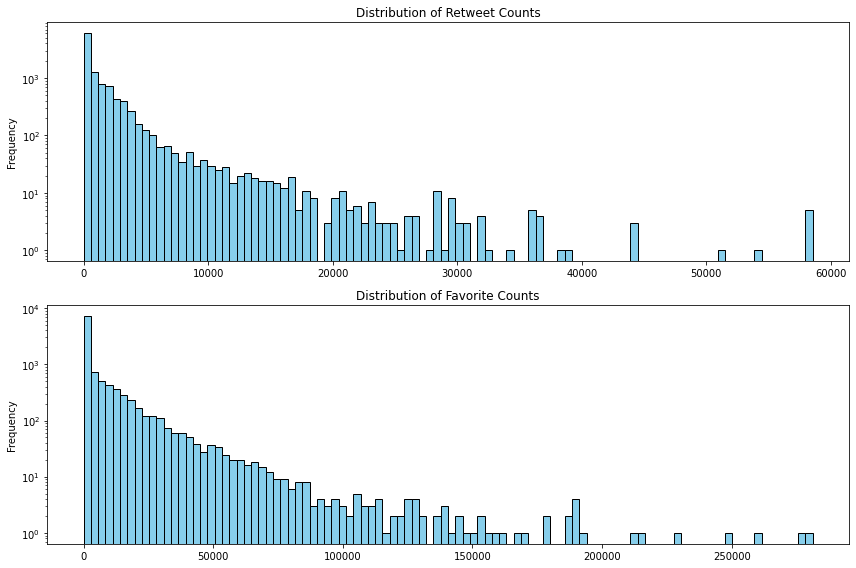

In [2]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(2, figsize=(12, 8))

# Plot the distribution of retweet counts
df['retweet_count'].plot(kind='hist', ax=axs[0], bins=100, title='Distribution of Retweet Counts', logy=True, color='skyblue', edgecolor='black')

# Plot the distribution of favorite counts
df['favorite_count'].plot(kind='hist', ax=axs[1], bins=100, title='Distribution of Favorite Counts', logy=True, color='skyblue', edgecolor='black')

# Adjust the layout
plt.tight_layout()


<br>

Here are the distributions of retweet counts and favorite counts for the tweets:

The top histogram shows the distribution of retweet counts. Most tweets have a low number of retweets, with a small number of tweets having a high number of retweets. This is a typical characteristic of social media posts, where a small number of posts go viral and get a lot of retweets.

The bottom histogram shows the distribution of favorite counts. The distribution is similar to that of retweet counts, with most tweets having a low number of favorites and a small number of tweets having a high number of favorites.

<br>

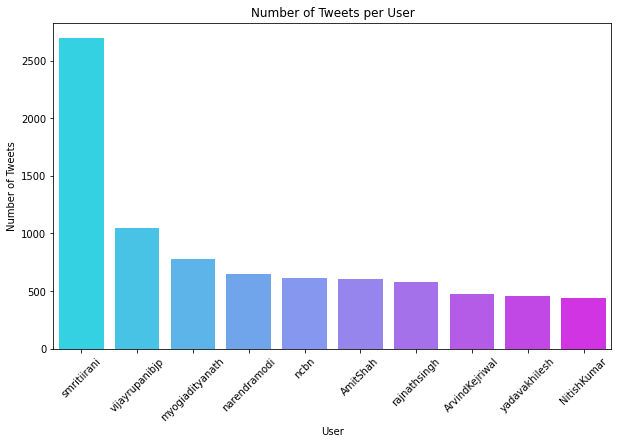

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Count the number of tweets per user
tweet_counts = df['screen_name'].value_counts()

# Create a bar plot of the top 10 users with the most tweets
plt.figure(figsize=(10, 6))
sns.barplot(tweet_counts[:10].index, tweet_counts[:10].values, palette="cool")
plt.title('Number of Tweets per User')
plt.xlabel('User')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

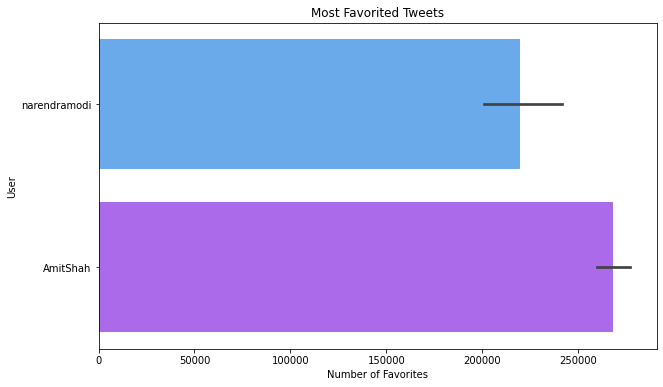

In [4]:
# Sort the DataFrame by 'favorite_count'
most_favorited_tweets = df.sort_values('favorite_count', ascending=False).head(10)

# Create a bar plot of the most favorited tweets
plt.figure(figsize=(10, 6))
sns.barplot(most_favorited_tweets['favorite_count'], most_favorited_tweets['screen_name'], palette="cool")
plt.title('Most Favorited Tweets')
plt.xlabel('Number of Favorites')
plt.ylabel('User')
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
import re

# Download the NLTK stop words
nltk.download('stopwords')

# Get the English stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert the text to lower case
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

# Preprocess the text
df['Processed_Text'] = df['Translation'].apply(preprocess_text)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the processed text
word_count = vectorizer.fit_transform(df['Processed_Text'])

# Get the words and their counts
words = vectorizer.get_feature_names_out()
counts = word_count.sum(axis=0).A1

# Create a DataFrame with the words and their counts
word_count_df = pd.DataFrame({'word': words, 'count': counts})

# Get the top 20 most frequently used words
top_words = word_count_df.sort_values('count', ascending=False).head(20)

top_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vatsalbharti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,word,count
16057,rt,3634
11853,minister,1716
12512,narendramodi,1694
9654,ji,1664
7713,government,1451
17276,shri,1397
13799,people,1396
19117,today,1392
4653,country,1390
1424,also,1182


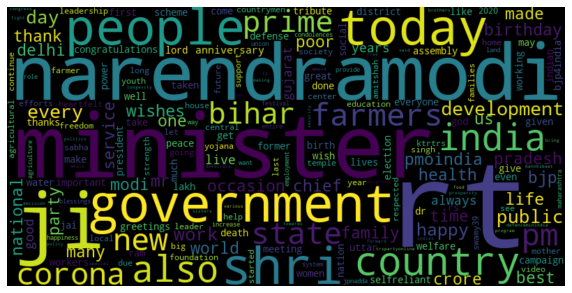

In [6]:
from wordcloud import WordCloud
# Create a WordCloud object without specifying a maximum font size
wordcloud = WordCloud(width=800, height=400, random_state=21).generate_from_frequencies(word_count_df.set_index('word')['count'])

# Display the WordCloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<br>

***Sentimental Analysis of each Author***

<br>

In [7]:
from textblob import TextBlob

def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Return the sentiment polarity
    return blob.sentiment.polarity

# Sentiment analysis for each author
df['Sentiment'] = df['Translation'].apply(get_sentiment)

# Group by author and calculate the mean sentiment for each author
author_sentiment = df.groupby('screen_name')['Sentiment'].mean()

author_sentiment

screen_name
AmitShah           0.203183
ArvindKejriwal     0.147387
KTRTRS             0.089026
KapilSibal         0.112221
MamataOfficial     0.383568
Naveen_Odisha      0.269370
NitishKumar        0.133032
OfficeofUT         0.090091
PawarSpeaks        0.122447
RahulGandhi        0.029284
ShashiTharoor      0.080911
Swamy39            0.097652
derekobrienmp      0.075168
myogiadityanath    0.206435
narendramodi       0.165200
ncbn               0.160070
rajnathsingh       0.157938
smritiirani        0.120871
vijayrupanibjp     0.189373
yadavakhilesh      0.072378
Name: Sentiment, dtype: float64

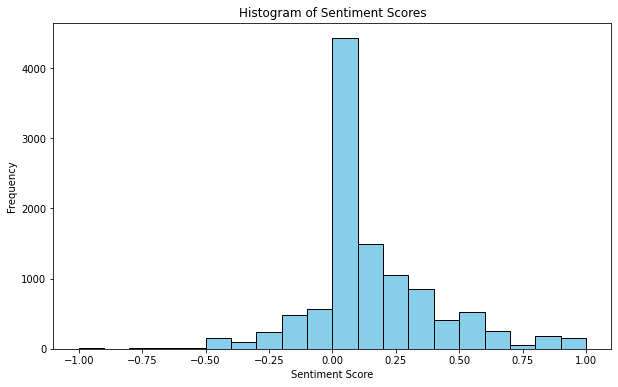

In [8]:
# Create a histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<br>

The sentiment score is a number between -1 and 1. Negative scores indicate negative sentiment, positive scores indicate positive sentiment, and a score of 0 indicates neutral sentiment. For example, the tweets by 'MamataOfficial' have the highest average sentiment score (0.384), indicating that they generally have a positive sentiment.

<br>

<br>

***We will do Topic modeling analysis to understand the main themes in the tweets***

We'll use the Latent Dirichlet Allocation (LDA) method for this. Please note that topic modeling can be a time-consuming process, especially for large datasets. Also, interpreting the results of topic modeling can sometimes be subjective
<br>

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define a function to print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Use CountVectorizer to get the term-document matrix
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(df['Translation'])

# Use LatentDirichletAllocation to perform LDA
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

<br>
Here are the main themes (topics) and the top words associated with each theme based on the Latent Dirichlet Allocation (LDA) analysis:


***Topic #0 (Festival Wishes)***: greetings, https, occasion, festival, mother, lord, blessings, best, wishes, happiness

***Topic #1 (Condolences and Thankfulness)***: ji, https, thank, wishes, family, death, best, peace, shri, thanks

***Topic #2 (Government and Public Services)***: https, government, people, bihar, state, minister, development, bjp, corona, public

***Topic #3 (Birthday Wishes)***: https, shri, birthday, happy, minister, rt, party, wish, ktrtrs, president

***Topic #4 (Fake News and Rally)***: pibfactcheck, claim, rally, fake, don, false, rajnathsingh_in, claimed, kutch, baba

***Topic #5 (Farmers and Government)***: farmers, https, rt, government, narendramodi, modi, minister, crore, poor, prime

***Topic #6 (Anniversaries and Tributes)***: anniversary, birth, day, freedom, https, great, tribute, country, salute, sacrifice

***Topic #7 (Bengal Issues)***: https, new, bengal, law, episode, rt, people, days, problems, today

***Topic #8 (Delhi and Health Issues)***: https, rt, delhi, dr, swamy39, corona, diwali, dengue, states, hindi

***Topic #9 (Country Progress)***: rt, https, india, narendramodi, country, today, ji, new, pm, self

<br>

`Twitter data can be used to identify trends, gauge public sentiment, understand popular topics, identify influential users, and much more. By coupling these insights with their reporting, one  can uncover new story angles, verify facts, and better understand their audience`